# How to use the trained parameters?

The aim of this demo is to show how to take the trained parameters for the IQP circuits used in the experiments for repeatability. The trained parameters, as well as the main results, resulting from every experiment presented in the thesis are openly stored in the "Experiments" folder as csv-documents.

For the example, we will use the parameters from the first experiment with ER graphs, in which the training was done for several values of the probability. The trained parameters for each probability value are found in the document ```Experiment1_params.csv```. Thus let us select a probability value and obtain a couple of ER graphs with the corresponding probability. 

In [26]:
import pandas as pd
import json

#Load the document Experiment1_params.csv
df = pd.read_csv('Experiments/Experiment1_params.csv')

print(df.head())

       Prob                                       Final Params
0  0.050000  [0.00036895893322744244, -0.000114243570207939...
1  0.073590  [0.08223943111286025, -0.017001216500446798, 0...
2  0.097179  [0.019977991458210588, 0.006968297686214334, 0...
3  0.120769  [0.09726261087750596, 0.12743328078830332, 0.0...
4  0.144359  [0.04996301538298241, 0.059488075571716065, 0....


Let us choose a random probability from the 40 possible values

In [27]:
probs, all_params = df['Prob'], df['Final Params'].apply(json.loads)

p = probs[20]
params = all_params[20]



The next step is to instantiate the IQP circuit with the corresponding gate structure, which in this case is generated from the function ```local_gates()``` in the ```iqpopt.utils``` library. It is important that the gate used are the same as the ones used during training.

In [28]:
import iqpopt as iqp
from iqpopt.utils import local_gates

gates = local_gates(n_qubits=15, max_weight=2)
circ = iqp.IqpSimulator(n_qubits=15,gates=gates,device="lightning.qubit")

Now we can sample the circuit with the trained parameters to generate some graphs

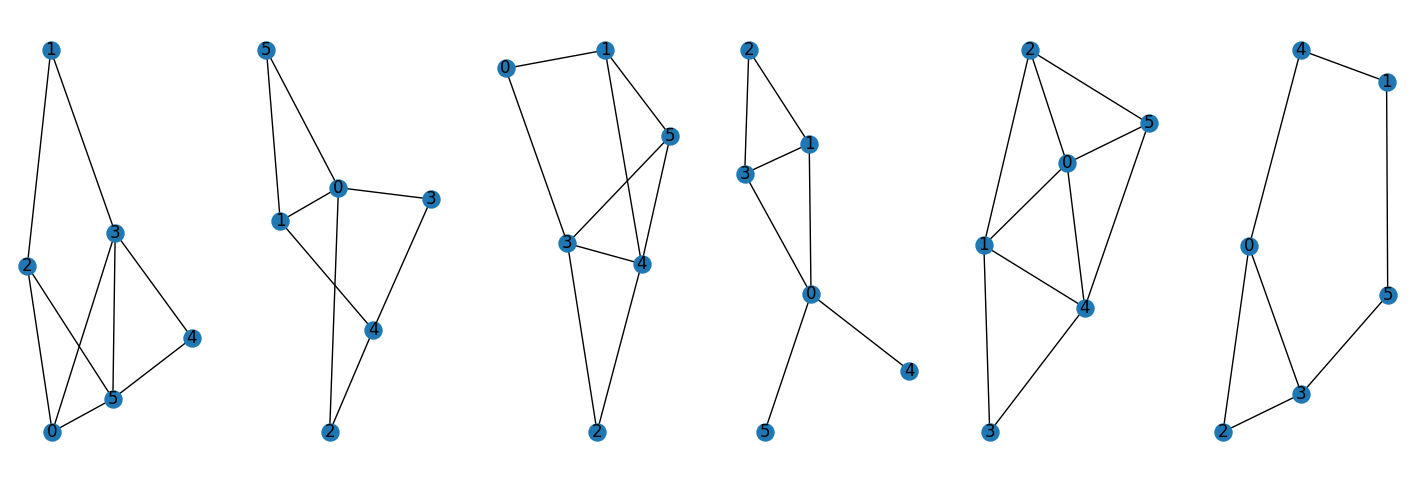

In [37]:
import matplotlib.pyplot as plt
from datasets.utils import vec_to_adj
import networkx as nx

n = 6
result = circ.sample(params,shots=n)
probs = [0.1,0.25,0.45,0.65]
fig, axs = plt.subplots(1, n, figsize=(3*n, n))
for i in range(n):
    #3. Trained Results
    ax_t = axs[i] 
    vec = result[i]
    adj = vec_to_adj(vec,num_vertices=6)
    G = nx.from_numpy_array(adj)
    nx.draw(G, ax=ax_t, with_labels=True, node_size=150)
    #ax_t.set_title(f'Trained IQP (p ={probs[i]} )', fontsize = 8)